In [1]:
import pandas as pd
import numpy as np

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Needed for Working with Time Series Data
from vega_datasets import data

# Working with Time Series Data exercises

## Exercises Part 1

In [2]:
# Temps dataset
df = data.sf_temps()
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


1. Resample by the day and take the average temperature. Visualize the average temperature over time.

<AxesSubplot:title={'center':'Average Daily Temperature'}, xlabel='date'>

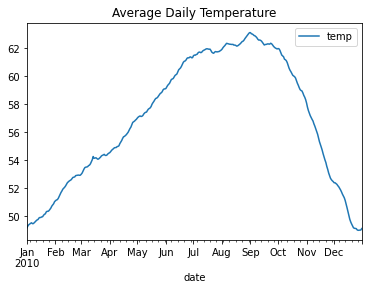

In [3]:
df = df.set_index('date')
pd.Timedelta('1d')
df.resample('D').mean().plot(title='Average Daily Temperature')

2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:title={'center':'Minimum Daily Temperature'}, xlabel='date'>

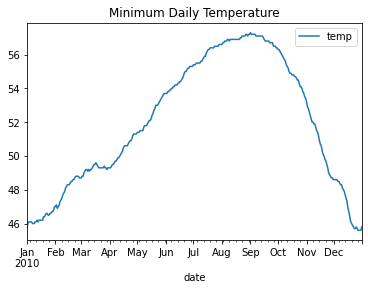

In [4]:
df.resample('D').min().plot(title='Minimum Daily Temperature')

3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:title={'center':'Maximum Daily Temperature'}, xlabel='date'>

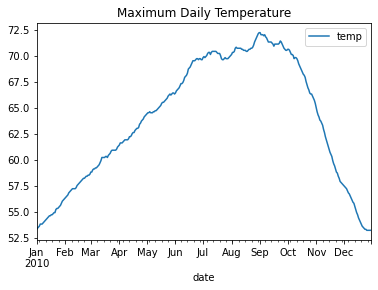

In [5]:
df.resample('D').max().plot(title='Maximum Daily Temperature')

4. Which month is the coldest, on average?

5. Which month has the highest average temperature?

In [6]:
df['month'] = df.index.strftime('%m-%b')
df.groupby('month').temp.mean().sort_values()

month
01-Jan    49.984140
12-Dec    50.498253
02-Feb    52.243899
03-Mar    53.956528
11-Nov    55.185139
04-Apr    55.633056
05-May    57.970968
10-Oct    60.253091
06-Jun    60.444722
07-Jul    61.765457
08-Aug    62.405376
09-Sep    62.487083
Name: temp, dtype: float64

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [7]:
# change in temp by day
daily = df.resample('D').temp.agg(['min', 'max'])
daily['temp_change'] = daily['max'] - daily['min']
daily['month'] = daily.index.strftime('%m-%b')
daily.groupby('month').temp_change.max().sort_values().tail()

month
10-Oct    14.4
06-Jun    14.8
07-Jul    14.8
09-Sep    14.9
08-Aug    15.0
Name: temp_change, dtype: float64

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date', ylabel='value'>

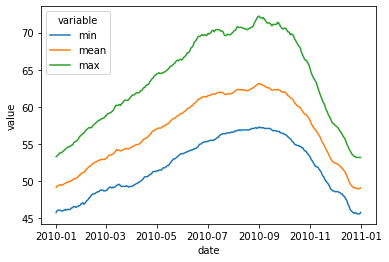

In [8]:
daily = df.resample('D').temp.agg(['min', 'mean', 'max'])
daily = daily.reset_index().melt(id_vars=['date'])
sns.lineplot(data=daily, x='date', y='value', hue='variable')

## Exercises Part 2

In [9]:
data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


1. Which year and month combination has the highest amount of precipitation?